# DA Humi Gadget in Housing Response Time RH

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean
#from quickplot import QuickPlot

import sensirion_fastedf as fastedf
import datetime
import data_access as da
import csv
import math
from scipy.optimize import curve_fit

In [2]:
amb1 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_RH2/2022-11-02_16-58-53-SHT4x_4029116353.edf')
amb2 = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_RH2/2022-11-02_16-58-53-SHT4x_4029123569.edf')
DM = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_RH2/20221102T160158Z_dmeiThunderMeas_HumiGadget_Resp_RH2/20221102T160220Z_dmeiThunderMeas_HumiGadget_Resp_RH2T24C/20221102T160220Z_DPM373_DewPointMirror.edf')

HumiGadget = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_RH2/Sensirion-MyAmbience-2022-11-03T09-27-52.148215/Sensirion_MyAmbience_SHT40_Gadget_Full_13C5_2022-11-03T09-31-05.769911.edf')
HumiGadgetbare = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_RH2/Sensirion-MyAmbience-2022-11-03T09-27-52.148215/Sensirion_MyAmbience_SHT40_Gadget_bare_F109_2022-11-03T09-34-17.826487.edf')
HumiGadgetHole = fastedf.read_edf(r'/home/jovyan/LABDATA/FAE/Humi_Gadget_Housing/ResponseTime_RH2/Sensirion-MyAmbience-2022-11-03T09-27-52.148215/Sensirion_MyAmbience_SHT40_Gadget_Hole_FEF1_2022-11-03T09-27-52.150902.edf')
# amb1.head()

# HumiGadget.RH.plot()
# print(HumiGadget)

start = datetime.datetime(2022,11,3,6,0).timestamp() # from amb1 starting measurement
# start = amb1.Epoch_UTC[0] + 11*60*60 # shifted by three hours since in the beginning it needed to adjust to the thunder
# print(start)

HumiGadget.Epoch_UTC = HumiGadget.Epoch_UTC - start
HumiGadgetbare.Epoch_UTC = HumiGadgetbare.Epoch_UTC - start
HumiGadgetHole.Epoch_UTC = HumiGadgetHole.Epoch_UTC -start
amb1.Epoch_UTC = amb1.Epoch_UTC - start
amb2.Epoch_UTC = amb2.Epoch_UTC - start
DM.Epoch_UTC = DM.Epoch_UTC - start
# print(HumiGadget)
HumiGadget = HumiGadget.where(HumiGadget.Epoch_UTC > 0).dropna()
HumiGadgetbare = HumiGadgetbare.where(HumiGadgetbare.Epoch_UTC > 0).dropna()
HumiGadgetHole = HumiGadgetHole.where(HumiGadgetHole.Epoch_UTC > 0).dropna()
amb1 = amb1.where(amb1.Epoch_UTC > 0).dropna()
amb2 = amb2.where(amb2.Epoch_UTC > 0).dropna()
DM = DM.where(DM.Epoch_UTC > 0).dropna()
# print(HumiGadget.head())
# print(HumiGadget.iloc[1,0])
# print(amb2.head())
print(HumiGadget.head())

       Epoch_UTC             Local_Date_Time       T      RH
31983        1.2  2022-11-03T07:00:01.164989  23.916  64.798
31984        3.2  2022-11-03T07:00:03.165649  23.943  64.769
31985        5.2  2022-11-03T07:00:05.165652  23.953  64.792
31986        7.2  2022-11-03T07:00:07.165655  23.927  64.790
31987        9.2  2022-11-03T07:00:09.165657  23.953  64.783


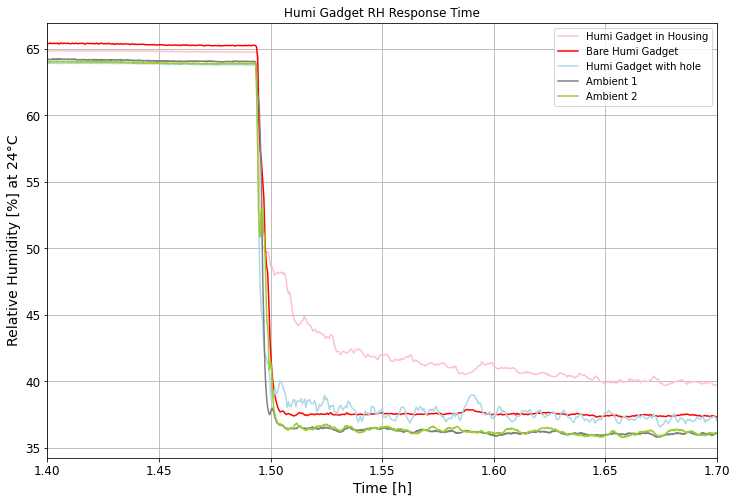

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.set_title('Humi Gadget RH Response Time')
# ax.fill_between(DM.Epoch_UTC/3600, DM.T_DewPointMirror - 0.5, DM.T_DewPointMirror + 0.5, facecolor='blue', alpha=0.1)
# ax.plot(DM.Epoch_UTC/3600, DM.T_DewPointMirror, color = 'blue')
ax.plot(HumiGadget.Epoch_UTC/3600, HumiGadget['RH'], color = 'pink')
ax.plot(HumiGadgetbare.Epoch_UTC/3600, HumiGadgetbare['RH'], color = 'red')
ax.plot(HumiGadgetHole.Epoch_UTC/3600, HumiGadgetHole['RH'], color = 'lightblue')
ax.plot(amb1.Epoch_UTC/3600, amb1.RH_SHT4x_4029116353, color = 'grey')
ax.plot(amb2.Epoch_UTC/3600, amb2.RH_SHT4x_4029123569, color = 'yellowgreen')

ax.set_ylabel('Relative Humidity [%] at 24°C', fontsize=14)
ax.set_xlabel('Time [h]', fontsize=14)
# ax.set_ylim(15,28)
ax.set_xlim(1.4,1.7)
ax.legend(['Humi Gadget in Housing','Bare Humi Gadget', 'Humi Gadget with hole','Ambient 1','Ambient 2'],loc='upper right')
ax.tick_params(labelsize=12)
ax.grid()

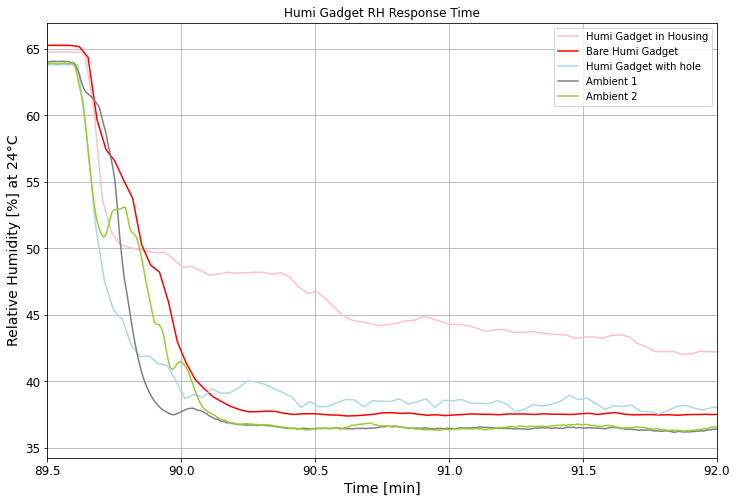

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.set_title('Humi Gadget RH Response Time')
# ax.fill_between(DM.Epoch_UTC/3600, DM.T_DewPointMirror - 0.5, DM.T_DewPointMirror + 0.5, facecolor='blue', alpha=0.1)
# ax.plot(DM.Epoch_UTC/3600, DM.T_DewPointMirror, color = 'blue')
ax.plot(HumiGadget.Epoch_UTC/60, HumiGadget['RH'], color = 'pink')
ax.plot(HumiGadgetbare.Epoch_UTC/60, HumiGadgetbare['RH'], color = 'red')
ax.plot(HumiGadgetHole.Epoch_UTC/60, HumiGadgetHole['RH'], color = 'lightblue')
ax.plot(amb1.Epoch_UTC/60, amb1.RH_SHT4x_4029116353, color = 'grey')
ax.plot(amb2.Epoch_UTC/60, amb2.RH_SHT4x_4029123569, color = 'yellowgreen')

ax.set_ylabel('Relative Humidity [%] at 24°C', fontsize=14)
ax.set_xlabel('Time [min]', fontsize=14)
# ax.set_ylim(15,28)
ax.set_xlim(89.5,92)
ax.legend(['Humi Gadget in Housing','Bare Humi Gadget', 'Humi Gadget with hole','Ambient 1','Ambient 2'],loc='upper right')
ax.tick_params(labelsize=12)
ax.grid()

## Response Time

In [13]:
responseStart = True
averageResponse = mean(amb1.RH_SHT4x_4029116353.where(amb1.Epoch_UTC/3600 > 1.6).dropna())
DMRH =  mean(amb1.RH_SHT4x_4029116353.where(amb1.Epoch_UTC/3600 < 1.4).dropna())
# print(averageResponse)
# print(DMRH)

for i in range(0, amb1.shape[0]):
    if amb1.iloc[i,3] < DMRH*0.9 and responseStart == True:
        responseStart = False
        StartTime1 = amb1.iloc[i,0] # Time when the response starts where the RH changes
        # print(Start/3600)
    if amb1.iloc[i,3] < ((averageResponse - DMRH)*0.63 + DMRH) and responseStart == False:
        # print((averageResponse - DMRH)*0.63 + DMRH)
        End = amb1.iloc[i,0] #Epoch Time when the temperature has reached roughly the ambient RH
        # print(amb2.iloc[i-1,3])
        # print(amb2.iloc[i,3])
        # print(End/3600)
        break
ResponseTimebare = End - StartTime1
# print(averageResponse)
print("Response Time of the flex SHT [s]:")
print(ResponseTimebare) 

responseStart = True
for i in range(0, amb2.shape[0]):
    if amb2.iloc[i,3] < DMRH*0.9 and responseStart == True:
        responseStart = False
        StartTime2 = amb2.iloc[i,0] # Time when the response starts where the RH changes
        # print(Start/3600)

responseStart = True
for i in range(0, HumiGadgetbare.shape[0]):
    # if HumiGadgetbare.iloc[i,2] > DMTemperature*1.1 and responseStart == True:
        # responseStart = False
        # Start = HumiGadgetbare.iloc[i,0] # Time when the response starts where the temperature changes
        # print(Start/3600)
    if HumiGadgetbare.iloc[i,3] < (averageResponse - DMRH)*0.63 + DMRH:
        End = HumiGadgetbare.iloc[i,0] #Epoch Time when the temperature has reached roughly the ambient RH
        # print(End/3600)
        break
ResponseTimebare = End - StartTime1
# print(averageResponse)
print("Response Time of the bare Humi Gadget [s]:")
print(ResponseTimebare)

responseStart = True
for i in range(0, HumiGadgetHole.shape[0]):
    if HumiGadgetHole.iloc[i,3] < (averageResponse - DMRH)*0.63 + DMRH:
        End = HumiGadgetHole.iloc[i,0] #Epoch Time when the temperature has reached roughly the ambient RH
        # print(End/3600)
        break
ResponseTime = End - StartTime2
# print(averageResponse)
print("Response Time of the Humi Gadget in the housing with Hole [s]:")
print(ResponseTime)

responseStart = True
for i in range(0, HumiGadget.shape[0]):
    if HumiGadget.iloc[i,3] < (averageResponse - DMRH)*0.63 + DMRH:
        End = HumiGadget.iloc[i,0] #Epoch Time when the temperature has reached roughly the ambient RH
        # print(End/3600)
        break
ResponseTime = End - StartTime2
# print(averageResponse)
print("Response Time of the Humi Gadget in the housing [s]:")
print(ResponseTime)

Response Time of the flex SHT [s]:
3.6000001430511475
Response Time of the bare Humi Gadget [s]:
13.0
Response Time of the Humi Gadget in the housing with Hole [s]:
5.299999952316284
Response Time of the Humi Gadget in the housing [s]:
48.799999952316284
